In [40]:
#importing required libraries

import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import time
import os,sys
import seaborn as sns

#setting display limits to maximum to view data in full scale

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [53]:
#reading the data
data_df=pd.read_csv('bank_marketing.csv')
data_df.head(10)


#resetting index
data_df.reset_index(drop=True,inplace=True)

In [54]:
#description of the data

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

We can see there are alot of categorical features

In [55]:
#summary of the dataset

data_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


1.The average age of the clients is approximately 40 years, with a standard deviation of 10.42. The youngest client is 17 years old, and the oldest is 98 years old

2.The average duration of the last contact with the client is approximately 258 seconds (about 4.3 minutes), with a standard deviation of 259.28 seconds. The shortest duration is 0 seconds, and the longest is 4918 seconds. This variable might be important as it seems to vary significantly.

3.Employment Variation Rate, Consumer Price Index, Consumer Confidence Index, and Euribor: These economic indicators show some variability but are centered around certain values. Understanding their impact on the outcome variable (deposit) could be crucial in building predictive models.

4.Only about 11.27% of clients in the dataset have made a deposit, based on the mean. This indicates class imbalance, 

In [56]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

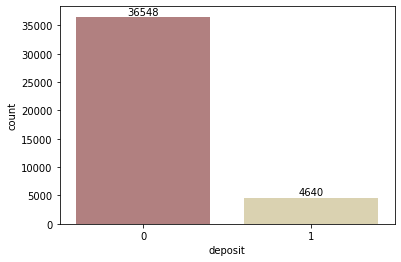

In [57]:
#mapping the target variables yes and no as 1 and 0 respectively
data_df['deposit'] = data_df['y'].replace({"yes": 1, "no": 0})
#data_df.drop('y',axis=1,inplace=True)
#data distribution of target variable

value = randint(0, len(colors)-1)
sns.countplot(data=data_df, x="deposit",palette = colors[value])

# Get value counts of 'deposit'
value_counts = data_df['deposit'].value_counts()

# Loop through each bar in the countplot and annotate the counts
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

There is imbalance in the data for the target variable, this needs to be accounted for when modelling

In [107]:
#let us feature engineer the education column by assigning categories

data_df['education_grouped'] =data_df['education'].replace({"university.degree": 'graduate', 
                                           "professional.course": 'graduate',
                                           'high.school':'high school',
                                           'basic.9y':'basic',
                                           'basic.6y':'basic',
                                           'basic.4y':'basic'})
data_df = data_df.rename(columns={'emp.var.rate': 'employment variation rate', 
                        'cons.price.idx': 'consumer price index', 
                        'cons.conf.idx': 'consumer confidence index',
                        'euribor3m': 'euribor',
                        'nr.employed': 'number of employees'})

data_df['job_grouped']=data_df['job'].replace({'entrepreneur':'self-employed'})
#data_df.drop('education',axis=1)
#data_df.drop('job',axis=1)

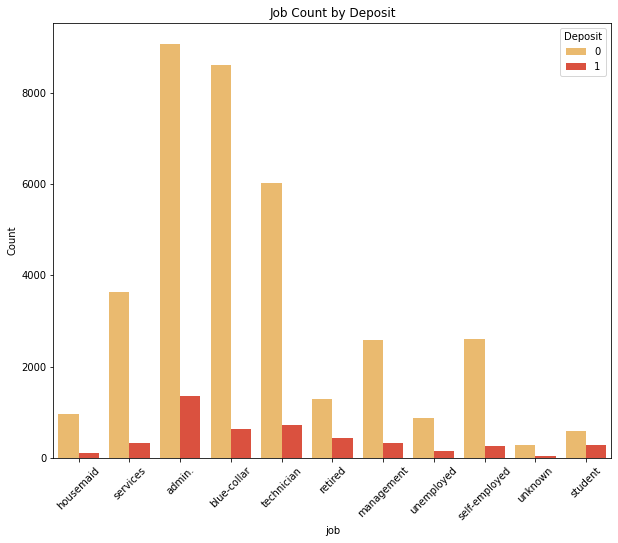

In [73]:
plt.figure(figsize=(10, 8))
value = randint(0, len(colors)-1)
sns.countplot(data=data_df, x='job_grouped', hue='deposit',palette = colors[value])
plt.title("Job Count by Deposit")
plt.xlabel("Jobs")
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Deposit', loc='upper right')
plt.show()


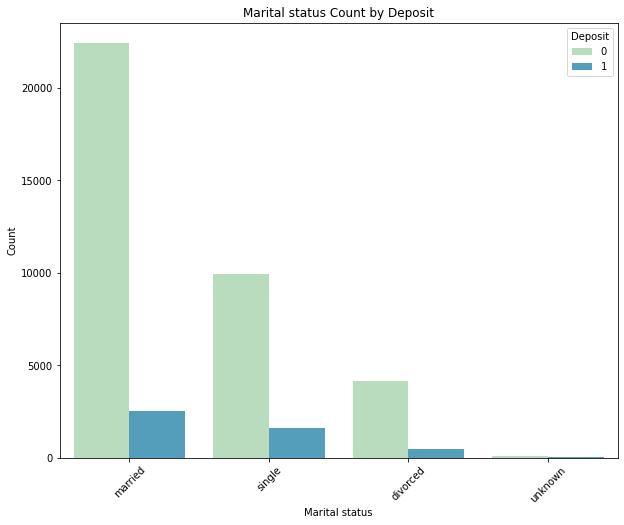

In [75]:
plt.figure(figsize=(10, 8))
value = randint(0, len(colors)-1)
sns.countplot(data=data_df, x='marital', hue='deposit',palette = colors[value])
plt.title("Marital status Count by Deposit")
plt.xlabel("Marital status")
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Deposit', loc='upper right')
plt.show()


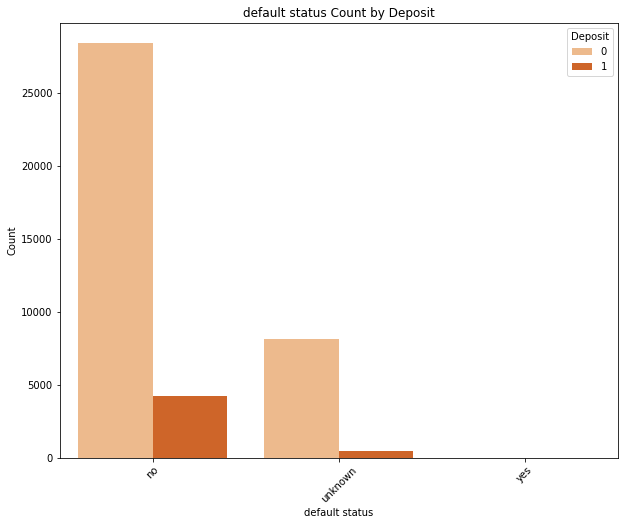

In [77]:
plt.figure(figsize=(10, 8))
value = randint(0, len(colors)-1)
sns.countplot(data=data_df, x='default', hue='deposit',palette = colors[value])
plt.title("default status Count by Deposit")
plt.xlabel("default status")
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Deposit', loc='upper right')
plt.show()


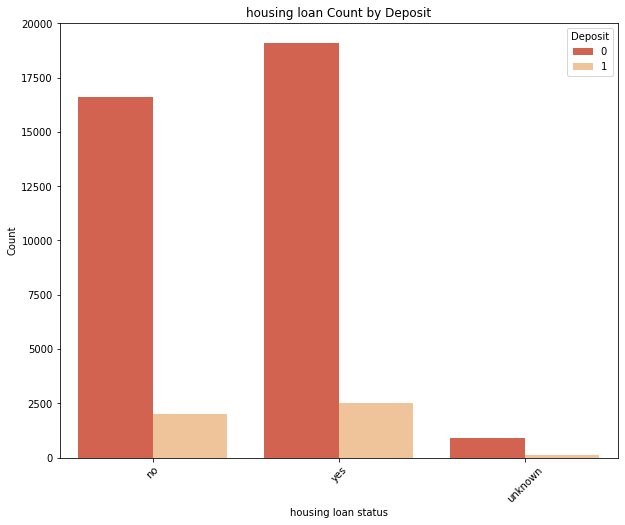

In [78]:
plt.figure(figsize=(10, 8))
value = randint(0, len(colors)-1)
sns.countplot(data=data_df, x='housing', hue='deposit',palette = colors[value])
plt.title("housing loan Count by Deposit")
plt.xlabel("housing loan status")
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Deposit', loc='upper right')
plt.show()


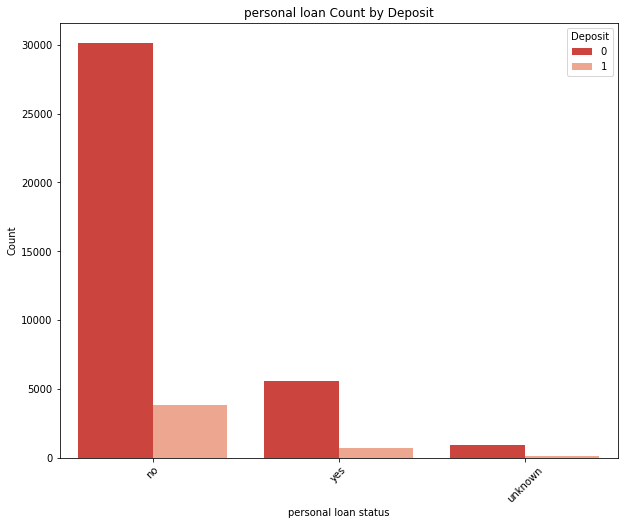

In [79]:
plt.figure(figsize=(10, 8))
value = randint(0, len(colors)-1)
sns.countplot(data=data_df, x='loan', hue='deposit',palette = colors[value])
plt.title("personal loan Count by Deposit")
plt.xlabel("personal loan status")
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Deposit', loc='upper right')
plt.show()


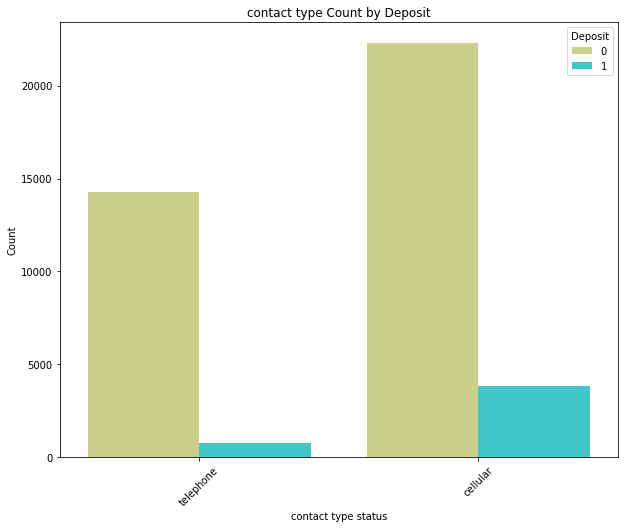

In [80]:
plt.figure(figsize=(10, 8))
value = randint(0, len(colors)-1)
sns.countplot(data=data_df, x='contact', hue='deposit',palette = colors[value])
plt.title("contact type Count by Deposit")
plt.xlabel("contact type status")
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Deposit', loc='upper right')
plt.show()


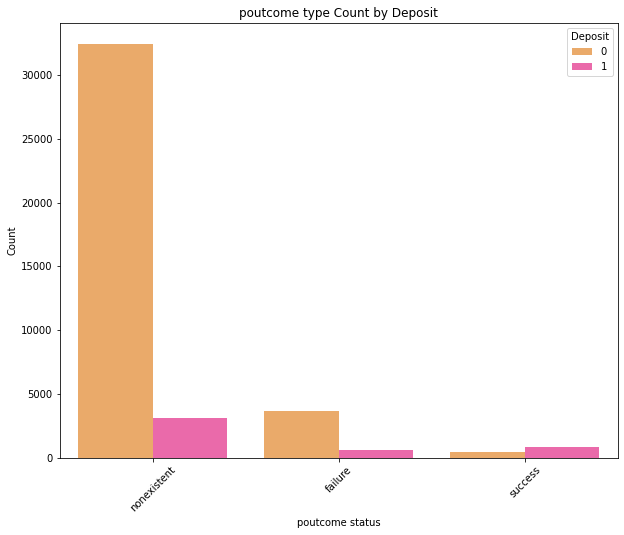

In [82]:
plt.figure(figsize=(10, 8))
value = randint(0, len(colors)-1)
sns.countplot(data=data_df, x='poutcome', hue='deposit',palette = colors[value])
plt.title("poutcome type Count by Deposit")
plt.xlabel("poutcome status")
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Deposit', loc='upper right')
plt.show()


1. Focusing on retired and student customer to opt for a term deposit is more efficient than contacting blue collar and services    employed customers.

2. Moving away from married customers and towards single marital status customers can increase conversion rate.

3. Focus on customers with personal loan for a term deposit.



0    7022
1    1277
Name: deposit, dtype: int64


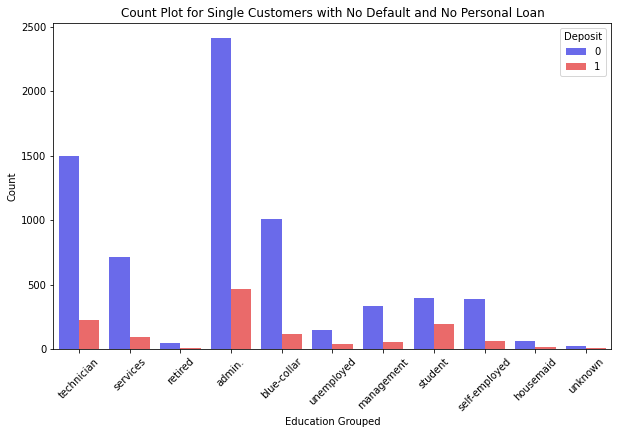

In [92]:
# Single Customers with No Default and No Personal Loan

filtered_data = data_df[(data_df['marital'] == 'single') & 
                          (data_df['default'] == 'no') & 
                          (data_df['loan'] == 'no')]
print(filtered_data['deposit'].value_counts())
value = randint(0, len(colors)-1)

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='job_grouped', hue='deposit',palette = colors[value])
plt.title('Count Plot for Single Customers with No Default and No Personal Loan')
plt.xlabel('Education Grouped')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Deposit', loc='upper right')
plt.show()

0    13539
1     1830
Name: deposit, dtype: int64


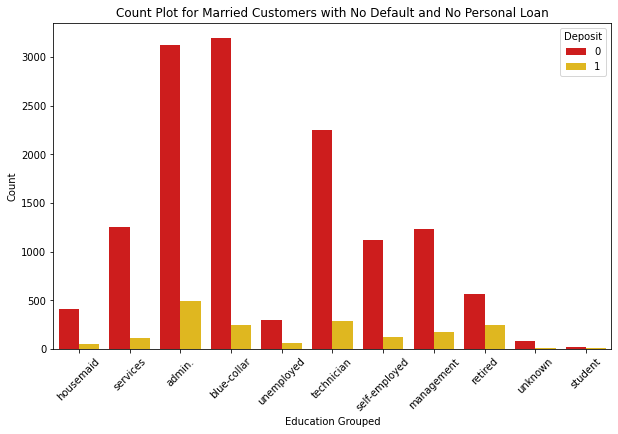

In [93]:
# Married Customers with No Default and No Personal Loan

filtered_data = data_df[(data_df['marital'] == 'married') & 
                          (data_df['default'] == 'no') & 
                          (data_df['loan'] == 'no')]
print(filtered_data['deposit'].value_counts())
value = randint(0, len(colors)-1)
# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='job_grouped', hue='deposit',palette = colors[value])
plt.title('Count Plot for Married Customers with No Default and No Personal Loan')
plt.xlabel('Education Grouped')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.legend(title='Deposit', loc='upper right')
plt.show()

We can see both categories of retired and single customers without any loan or defaults make up 
more than half of the customers who opted for a deposit, focusing on them will be more efficient.

Average call duration must be lower than 258.2850101971448 seconds


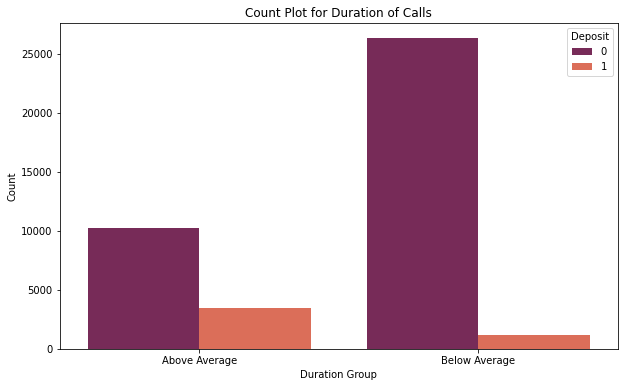

In [101]:
average_duration = data_df['duration'].mean()
print("Average call duration must be lower than",average_duration,"seconds")
# Create a new column indicating if the call duration is above or below average
data_df['duration_group'] = data_df['duration'].apply(lambda x: 'Above Average' if x > average_duration else 'Below Average')
value = randint(0, len(colors)-1)
# Plot the graph
plt.figure(figsize=(10, 6))
sns.countplot(data=data_df, x='duration_group', hue='deposit',palette = colors[value])
plt.title('Count Plot for Duration of Calls')
plt.xlabel('Duration Group')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()

Average call duration must be lower than 258 seconds/ not greated than 4 minutes, these calls have better chance of bringing in more deposit.

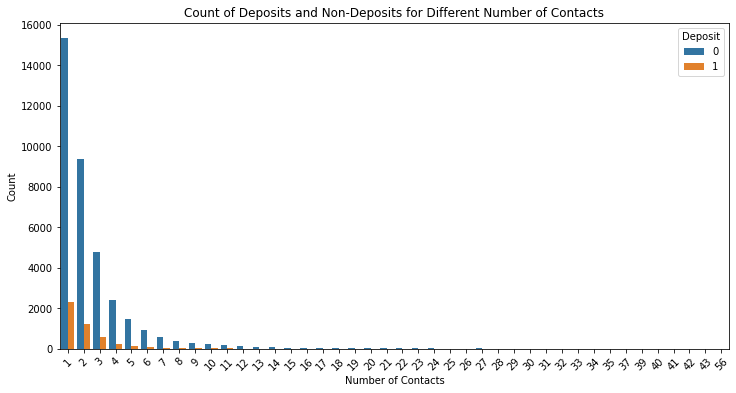

In [103]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_df, x='campaign', hue='deposit')
plt.title('Count of Deposits and Non-Deposits for Different Number of Contacts')
plt.xlabel('Number of Contacts')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary
plt.show()

The number of times a customer needs to be called for the term deposit in the same campaign is at maximum 4, we can see no further conversion occuring after 4 calls for any customers.

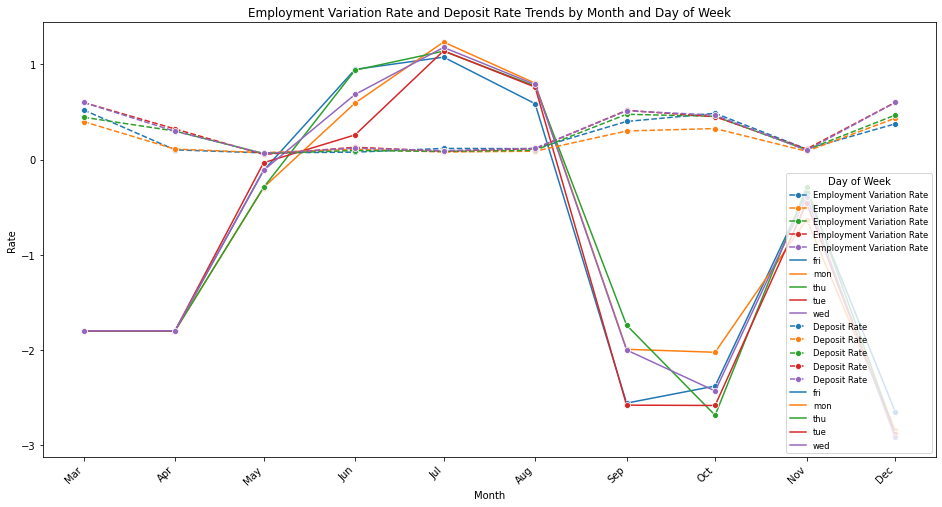

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming bank_data is your DataFrame containing the data

# Convert 'month' to datetime format
data_df['month'] = pd.to_datetime(data_df['month'], format='%b')

# Aggregate data based on 'month' and 'day_of_week'
monthly_aggregated = data_df.groupby(['month', 'day_of_week']).agg({
    'employment variation rate': 'mean',
    'consumer price index': 'mean',
    'consumer confidence index': 'mean',
    'deposit': 'mean'  # Mean deposit rate for each month and day_of_week
}).reset_index()

# Plotting the trends
plt.figure(figsize=(16, 8))

# Plot Employment Variation Rate
sns.lineplot(data=monthly_aggregated, x='month', y='employment variation rate', hue='day_of_week', marker='o', label='Employment Variation Rate')

# Plot Deposit Rate
sns.lineplot(data=monthly_aggregated, x='month', y='deposit', hue='day_of_week', marker='o', linestyle='dashed', label='Deposit Rate')

plt.title('Employment Variation Rate and Deposit Rate Trends by Month and Day of Week')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.legend(title='Day of Week', loc='lower right',fontsize='small')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Format x-axis date labels to show only month and year
plt.show()


We can see that when employment variation rate increases the deposit rate goes up in the next month, this is because more of customers are getting employed and hence has more money to save and spend.

Calls should go ahead right after the EVR peaks to the previously identified customers to get more deposits in.

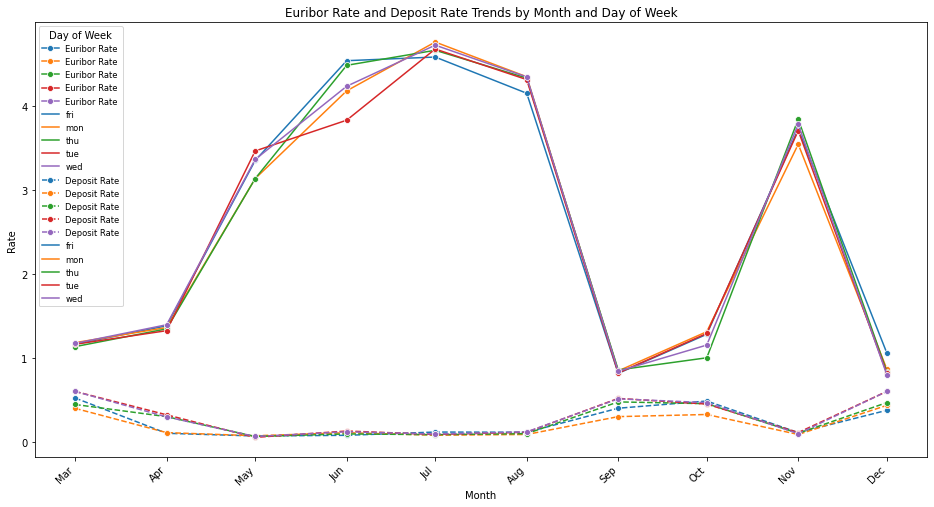

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming bank_data is your DataFrame containing the data

# Convert 'month' to datetime format
data_df['month'] = pd.to_datetime(data_df['month'], format='%b')

# Aggregate data based on 'month' and 'day_of_week'
monthly_aggregated = data_df.groupby(['month', 'day_of_week']).agg({
    'employment variation rate': 'mean',
    'consumer price index': 'mean',
    'consumer confidence index': 'mean',
    'euribor': 'mean',
    'deposit': 'mean'  # Mean deposit rate for each month and day_of_week
}).reset_index()

# Plotting the trends
plt.figure(figsize=(16, 8))

# Plot Euribor Rate
sns.lineplot(data=monthly_aggregated, x='month', y='euribor', hue='day_of_week', marker='o', label='Euribor Rate')

# Plot Deposit Rate
sns.lineplot(data=monthly_aggregated, x='month', y='deposit', hue='day_of_week', marker='o', linestyle='dashed', label='Deposit Rate')

plt.title('Euribor Rate and Deposit Rate Trends by Month and Day of Week')
plt.xlabel('Month')
plt.ylabel('Rate')
plt.legend(title='Day of Week', loc='upper left', fontsize='small')  # Lower the size of the legend
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))  # Format x-axis date labels to show only month and year
plt.show()


Euribor rate (average interest rate at which European banks offer to lend funds to one another in the euro interbank market) affects the deposit rate as we can above. When the rates decrease they also bring up the interest rate offered to deposits hencefor encouraging more customers to open a term deposit.

The seasonality is observed as shown and calls to previously identifed potential customers will be more efficient.